## Perkenalan

Nama : Dwi Bagus Prasetyo\
Batch : RMT-027

link dashboard : https://public.tableau.com/views/M1_17049660820890/Story1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Identifikasi Masalah

Client saya ingin meningkatkan rating dari produk coklat yang mereka jual namun Client saya belum tau coklat seperti apa yang disukai oleh orang-orang. Sebagai data analyst saya diminta client untuk menganalisa data menggunakan statistik dan dashboard visualisasi.

### Problem Statment SMART

- **Spesific** : Meningkatkan rating produk coklat dengan cara meningkatkan kualitas coklat
- **Measureable** : Meningkatkan rating coklat batang menjadi 3.5
- **Achievable** : Target bisa dicapai dengan meningkatkan kualitas coklat dari segi jenis kakao dan kadar kakao pada coklat
- **Relevant** : Dengan meningkatkan kualitas coklat maka akan meningkatkan rating dari produk coklat sehingga penjualan coklat akan meningkat
- **Time-Bound** : Target meningkatkan rating produk menjadi 3.5 bisa dicapai dalam waktu 6 bulan

**Problem Statment** : Untuk meningkatkan rating produk coklat dengan cara meningkatkan kualitas coklat dari segi jenis kakao dan kadar kakao pada coklat akan meningkat kan rating produk coklat menjadi 3.5 dalam waktu 6 bulan

Penjabaran masalah dengan 5W+1H:
- Berapa  rata-rata kadar persentase kakao pada coklat yang dibuat oleh perusahaan?
- Apakah Rata-rata Rating Coklat pada negara Canada lebih tinggi dari Negara U.S.A di tahun 2017?
- Jenis kakao apa yang sering digunakan dalam pembuatan coklat?
- Siapa Negara dengan Perusahaan pembuat coklat terbanyak?
- Berapakah rata-rata rating Coklat yang didapat negara U.S.A. tiap Tahun nya?
- Apakah kandungan persentase kakao mempengaruhi rating dari coklat batangan?

## Data Loading

import Library yang dibutuhkan

In [107]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Load data dari file flavors_of_cacao.csv yang diambil dari datasheet di kaggle.com

In [108]:
df_coklat = pd.read_csv('flavors_of_cacao.csv') #load data dari file csv

In [109]:
df_coklat.head() #tampilkan 5 data teratas

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [110]:
df_coklat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [111]:
# Cek Apakah ada data yang null atau NaN
df_coklat.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

Insight :
- Label kolom pada data perlu di sesuaikan agar mudah diproses
- drop kolom REF karena tidak dibutuhkan
- handle missing value pada kolom Bean Type dan Bean Origin
- Hilangkan simbol percent pada coco percent karena hanya ingin mengambil angkanya
- Terdapat tipe data yang belum sesuai, harus disesuaikan terlebih dahulu

## Data Cleaning

**Kita lakukan data cleaning sesuai dengan hasil temuan saat load data**

#### Ubah label kolom data

In [112]:
# Ubah Label dari kolom data
new_column = {'Company\xa0\n(Maker-if known)':'Company', 'Specific Bean Origin\nor Bar Name':'Chocolate Bar',
       'REF':'REF', 'Review\nDate':'Year', 'Cocoa\nPercent' : 'Cocoa Percent', 'Company\nLocation' : 'Company Location', 'Rating':'Rating',
       'Bean\nType':'Bean Type', 'Broad Bean\nOrigin':'Bean Origin'}
df_coklat.rename(columns=new_column, inplace=True)

#### Drop kolom REF

In [113]:
# Hapus kolom REF
df_coklat.drop('REF', axis=1, inplace=True)

#### Handle missing value pada kolom Bean Type dan Bean Origin

Hapus spasi di awal dan akhir dari data Bean Type dan Bean Origin

In [114]:
df_coklat['Bean Type'] = df_coklat['Bean Type'].str.strip() # hilangkan spasi diawal dan diakhir kolom Bean Type
df_coklat['Bean Origin'] = df_coklat['Bean Origin'].str.strip() # hilangkan spasi diawal dan diakhir kolom Bean Origin

Ubah data empty string atau white space pada data frame menjadi Unknown

In [115]:
# Ubah data empty string atau white space pada data frame menjadi Missing
df_coklat['Bean Type'] = df_coklat['Bean Type'].replace('', 'Unknown')
df_coklat['Bean Origin'] = df_coklat['Bean Origin'].replace('', 'Unknown')

#### Hilangkan simbol percent pada Cocoa percent

In [116]:
df_coklat['Cocoa Percent'] = df_coklat['Cocoa Percent'].str.replace('%', '')

#### Ubah Tipe Data Cocoa Percent

Ubah tipe data Cocoa Percent menjadi float

In [117]:
df_coklat['Cocoa Percent'] = df_coklat['Cocoa Percent'].astype(float)

In [118]:
df_coklat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   object 
 1   Chocolate Bar     1795 non-null   object 
 2   Year              1795 non-null   int64  
 3   Cocoa Percent     1795 non-null   float64
 4   Company Location  1795 non-null   object 
 5   Rating            1795 non-null   float64
 6   Bean Type         1794 non-null   object 
 7   Bean Origin       1794 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 112.3+ KB


Data sudah kita lakukan cleaning dan sudah siap kita gunakan

In [293]:
df_coklat.to_csv('Dwi_bagus.csv', index=False)

## Analisis dan Perhitungan

#### Berapa  rata-rata kadar persentase kakao pada coklat yang dibuat oleh perusahaan?

Kita dapat menjawab pertanyaan di atas dengan Statistik Deskriptif dengan menhitung Central Tendency datanya

In [139]:
print('Rata-rata persentase kakao dalam coklat yang dibuat :', df_coklat['Cocoa Percent'].mean(),'%')
print('Median dari persentase kakao', df_coklat['Cocoa Percent'].median(), '%')
print('Modus dari persentase kakao', df_coklat['Cocoa Percent'].mode()[0], '%')
print('Skewness', df_coklat['Cocoa Percent'].skew())

Rata-rata persentase kakao dalam coklat yang dibuat : 71.6983286908078 %
Median dari persentase kakao 70.0 %
Modus dari persentase kakao 70.0 %
Skewness 1.0586035291952456


Dari hasil perhitungan rata-rata persentase kakao yang dipakai untuk membuat coklat adalah 71.69%\
Dengan Median 70% dan Modus 70%\
Dan terdapat skew senilai 1.0586035291952456 yang berarti datanya Highly Skew dan memiliki skew positif

<Axes: >

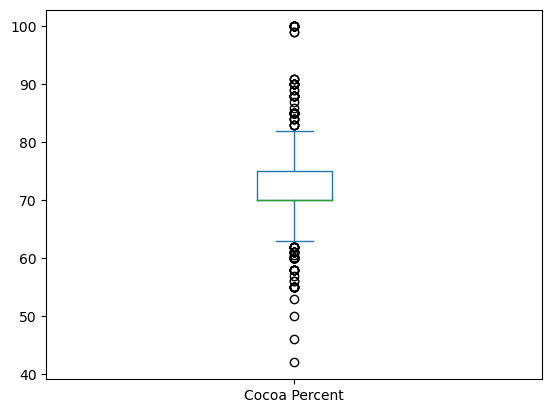

In [140]:
df_coklat['Cocoa Percent'].plot(kind='box') # Buat box plot dari data Cocoa Percent

Dari Chart Box Plot dapat dilihat rata-rata kakao percent berada di 71% lower bounday nya sekitar 63-64 dan upper boundary sekitar 82-83 dan masih terdapat outlier pada data Cocoa Percent

#### Apakah Rata-rata Rating Coklat pada negara Canada lebih tinggi dari Negara U.S.A di tahun 2017?

Kita bisa menggunakan Statistik Inferential untuk menjawab pertanyaan diatas dengan teknik Two Sample Independent Test

In [290]:
# Ambil data rating Coklat di tahun 2017 Negara Canada & USA
Canada = df_coklat[(df_coklat['Company Location']=='Canada') & (df_coklat['Year']==2017)][['Company Location', 'Rating']]
Usa = df_coklat[(df_coklat['Company Location']=='U.S.A.') & (df_coklat['Year']==2017)][['Company Location', 'Rating']]

Kita tentukan H0 dan H1 nya\
H0 : Rata-rata Rating Coklat di Canada >= Rata-rata Rating Coklat di USA pada tahun 2017\
H1 : Rata-rata Rating Coklat di Canada < Rata-rata Rating Coklat di USA pada tahun 2017

In [292]:
# Perhitungan p-value dengan teknik two sample independent test
t_stat, p_val = stats.ttest_ind(Canada['Rating'], Usa['Rating'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 0.7687359807886864
P-value: 0.45398437709642003


Dari Hasil Perhitungan Two Sample Independent Test diatas didapatkan p-value: 0.45398437709642003 yang berarti lebih dari critical value 0.05 dan dapat disimpulkan bahwa H0 diterima yang berarti Rata-rata Rating Coklat di Canada >= Rata-rata Rating Coklat di USA pada tahun 2017

#### Jenis kakao apa yang sering digunakan dalam pembuatan coklat?

Kita bisa melihat jenis kakao yang paling banyak digunakan dalam pembuatan coklat dengan Pie Chart

In [158]:
# Kita filter data Top 10 jenis kakao yang digunakan selain unknown
Top_jenis_kakao = df_coklat['Bean Type'][df_coklat['Bean Type']!='Unknown'].value_counts().head(10)
Top_jenis_kakao

Bean Type
Trinitario               419
Criollo                  153
Forastero                 87
Forastero (Nacional)      52
Blend                     41
Criollo, Trinitario       39
Forastero (Arriba)        37
Criollo (Porcelana)       10
Trinitario, Criollo        9
Forastero (Parazinho)      8
Name: count, dtype: int64

<Axes: ylabel='Bean Type'>

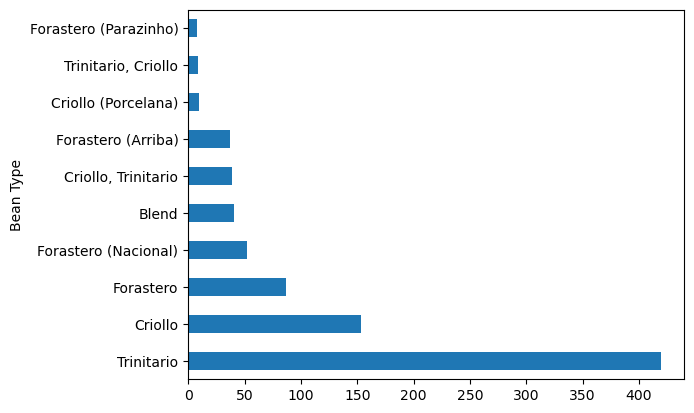

In [159]:
Top_jenis_kakao.plot(kind='barh')

Dari Bar Chart diatas kita bisa simpulkan bahwa Jenis kakao yang paling sering digunakan dalam pembuatan coklat adalah jenis Trinitario karena digunakan dalam 419 pembuatan coklat disusul dengan Criollo sebanyak 153 dan Forastero sebanyak 87

#### Siapa Negara dengan Perusahaan pembuat coklat terbanyak?

Kita gunakan Pie Chart untuk melihat banyaknya perusahaan pembuat coklat di tiap negara

In [ ]:
# Kita siapkan data berdasarkan filter top 10 Negara pembuat coklat
Top_negara_company = df_coklat.groupby(['Company Location'])['Company'].nunique().sort_values(ascending=False).head(10)
Top_negara_company

Company Location
U.S.A.       175
France        22
Canada        20
U.K.          20
Ecuador       13
Australia     10
Italy         10
Peru          10
Germany       10
Japan          8
Name: Company, dtype: int64

<Axes: ylabel='Company'>

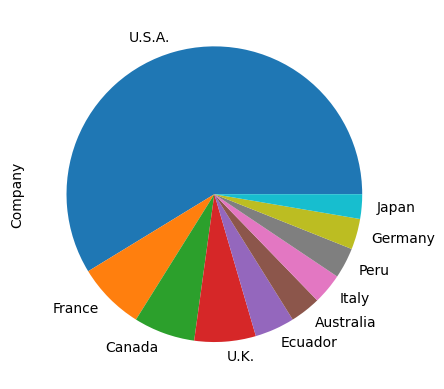

In [ ]:
Top_negara_company.plot(kind='pie')

Dari Pie Char diatas kita bisa lihat bahwa Negara dengan Perusahaan pembuat coklat terbanyak ada di U.S. disusul France dan Canada

#### Berapakah rata-rata rating Coklat yang didapat negara U.S.A. tiap Tahun nya?

Kita gunakan line chart untuk melihat perubahan rating coklat di USA tiap tahunnya

In [259]:
# Kita hitung rata-rata rating coklat di negara USA tiap tahunnya
rating_tahun = df_coklat[['Company Location', 'Year', 'Rating']][df_coklat['Company Location'].isin(['U.S.A.'])].groupby(['Year'])['Rating'].mean()

<Axes: xlabel='Tahun', ylabel='Rating'>

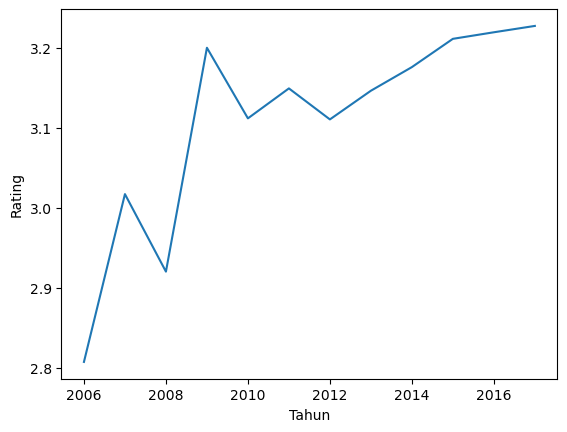

In [257]:
# Buat plot line dengan data Rata-rata rating di negara USA
rating_tahun.plot(kind='line', x='Year', y='Rating', xlabel='Tahun', ylabel='Rating')

Dari Line Chart diatas dapat dilihat bahwa rating coklat di Negara USA mengalami kenaikan di tahun 2016-2017 dan sempat mengalami penurunan di tahun 2008

#### Apakah kandungan persentase kakao mempengaruhi rating dari coklat batangan?

Kita bisa cek relasi antara persentase kakao dengan rating coklat dengan Scatter Chart

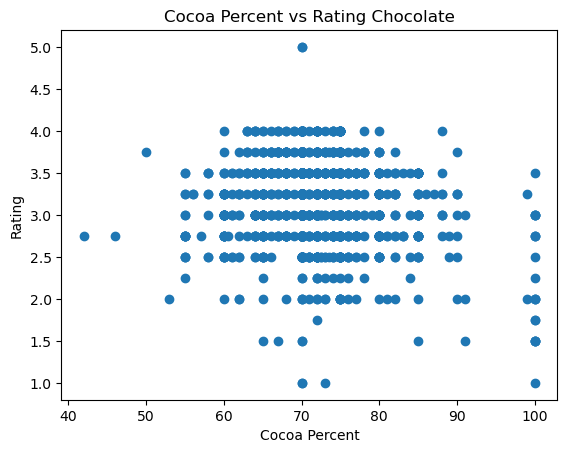

In [261]:
fig, ax = plt.subplots()

ax.set_title('Cocoa Percent vs Rating Chocolate')
ax.set_xlabel('Cocoa Percent')
ax.set_ylabel('Rating')

ax.scatter(df_coklat['Cocoa Percent'],df_coklat['Rating'])
plt.show()

Jika kita lihat dari Scatter chart persentase kakao disekitar angka 70% rata-rata memilki rating 3 sampai 4 bahkan ada yang memiliki rating 5\
Namun juga ada Rating yang di bawah 3

In [263]:
corr_rho, pval_s = stats.spearmanr(df_coklat['Cocoa Percent'], df_coklat['Rating'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.12, p-value: 1.3478910193770237e-07


Jika kita lihat dari perhitungan menggunakan teknik spearman nilai korelasinya -0.12 yang menandakan negatif koralasi serta p-value nya didapat nilai 1.3478910193770237e-07 yang berarti lebih kecil dari critical value 0.05 berarti hubungan antara Cocoa Percent dengan Rating terjadi kebetulan

## Kesimpulan

Dari Hasil analisa kita bisa ambil point:
1. Rata-rata kadar kakao yang di pakai untuk membuat coklat adalah 71%
2. Jenis kakao yang paling sering digunakan dalam pembuatan coklat adalah jenis Trinitario
3. Negara dengan Perusahaan pembuat coklat terbanyak adalah U.S.A
4. Kandungan persentase kakao belum tentu mempengaruhi rating dari coklat

Kalau kita simpulkan jika kita ingin membuat coklat yang kita dapat mencoba membuat coklat dengan kadar kakao 71% dan menggunakan kakao jenis Trinitario. Kita juga bisa research coklat yang dibuat di USA untuk mengembangkan kualitas coklat yang akan kita buat.